In [1]:
import numpy as np
import random
import os
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

#date of coding
import datetime
d= datetime.datetime.now()
d.strftime('%Y-%m-%d %H:%M:%S')

'2022-09-18 15:21:08'

In [ ]:
import torch

________________

### In CNN (input→ feature learning→ classification): 2 times "Convolutional layer+ Relu acctivation, Max Pooling (to reduce the size of image)"

# Load Dataset:

In [2]:
X_train = np.loadtxt('input.csv', delimiter = ',')
Y_train = np.loadtxt('labels.csv', delimiter = ',')

X_test = np.loadtxt('input_test.csv', delimiter = ',')
Y_test = np.loadtxt('labels_test.csv', delimiter = ',')

In [3]:
#Reshape data
X_train = X_train.reshape(len(X_train), 100, 100, 3) #which was 30000
Y_train = Y_train.reshape(len(Y_train), 1) #

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

#normalizing by 255 (RGB value)
X_train = X_train/255.0
X_test = X_test/255.0

In [4]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


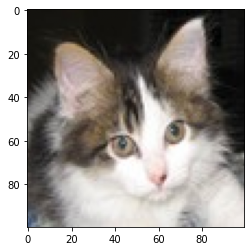

In [5]:
#showing a random data (train):

idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

# Model:


In [6]:
#First way:

model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

### 2 Conv + Flatten + 2 Dense:

In [7]:
#2nd Way:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3))) #convolutional layer 1
model.add(MaxPooling2D((2,2))) #MaxPool layer ► to reduce the size

model.add(Conv2D(32, (3,3), activation = 'relu')) #Convolutional Layer 2
model.add(MaxPooling2D((2,2))) #MaxPool Layer 2

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid')) #Output layer   #1 and sigmoid since it is Binary Classification

#info of model:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 16928)             0         
                                                                 
 dense_2 (Dense)             (None, 64)               

# Tuning hyperparameters on model (compiling)
- https://keras.io/api/optimizers/

In [8]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [10]:
#fit on train dataset:

model.fit(X_train, Y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 [==============================] - 11s 348ms/step - loss: 0.4382 - accuracy: 0.7975
Epoch 2/5
32/32 [==============================] - 11s 350ms/step - loss: 0.3768 - accuracy: 0.8395
Epoch 3/5
32/32 [==============================] - 11s 345ms/step - loss: 0.3738 - accuracy: 0.8355
Epoch 4/5
32/32 [==============================] - 11s 348ms/step - loss: 0.3007 - accuracy: 0.8710
Epoch 5/5
32/32 [==============================] - 11s 347ms/step - loss: 0.2400 - accuracy: 0.9070


In [12]:
#Evaluating:
model.evaluate(X_test, Y_test)  #it is acceptable and id near 0.96 ► Not overfitted

13/13 [==============================] - 1s 53ms/step - loss: 0.6025 - accuracy: 0.6975


[0.6025435924530029, 0.6974999904632568]

# Prediction:

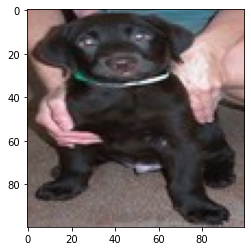

1/1 [==============================] - 0s 24ms/step
The model says it is a : Dog


In [21]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'Dog'
else:
    pred = 'Cat'
    
print("The model says it is a :", pred)